In [17]:
# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style


# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
from matplotlib.dates import HourLocator

#Statistics package
from scipy import stats

In [2]:
df = pd.read_csv('Results.csv')
#Separate controls and all data
Control_df=df[df.P!='Control']
All_df=df
df=df[df.P!='Control']
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 200
Data columns (total 14 columns):
P                 178 non-null object
#                 178 non-null int64
Repeat_no         178 non-null float64
Control           178 non-null object
Date              178 non-null object
Age               178 non-null int64
Induction_time    178 non-null object
Lose_TR_time      178 non-null object
RR_beats          178 non-null float64
RR_breaths        178 non-null float64
SL                178 non-null float64
TT_movement       167 non-null object
TT_Recovery       167 non-null object
Recovery          178 non-null object
dtypes: float64(4), int64(2), object(8)
memory usage: 20.9+ KB


In [3]:
#Inspect the first 5 rows 

from datetime import datetime

sequence = ['Induction_time','Lose_TR_time','TT_movement','TT_Recovery']

#Convert to seconds
for i in sequence:
    df[i+'_sec']=df[i].str[:2].astype(float)*60*60+df[i].str[3:5].astype(float)*60+df[i].str[-2:].astype(float)
    df[i]=pd.to_datetime(df[i], format='%H:%M:%S')

df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 0 to 200
Data columns (total 18 columns):
P                     178 non-null object
#                     178 non-null int64
Repeat_no             178 non-null float64
Control               178 non-null object
Date                  178 non-null object
Age                   178 non-null int64
Induction_time        178 non-null datetime64[ns]
Lose_TR_time          178 non-null datetime64[ns]
RR_beats              178 non-null float64
RR_breaths            178 non-null float64
SL                    178 non-null float64
TT_movement           167 non-null datetime64[ns]
TT_Recovery           167 non-null datetime64[ns]
Recovery              178 non-null object
Induction_time_sec    178 non-null float64
Lose_TR_time_sec      178 non-null float64
TT_movement_sec       167 non-null float64
TT_Recovery_sec       167 non-null float64
dtypes: datetime64[ns](4), float64(8), int64(2), object(4)
memory usage: 26.4+ KB


/home/jpo22/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/jpo22/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,P,#,Repeat_no,Control,Date,Age,Induction_time,Lose_TR_time,RR_beats,RR_breaths,SL,TT_movement,TT_Recovery,Recovery,Induction_time_sec,Lose_TR_time_sec,TT_movement_sec,TT_Recovery_sec
0,1,1,1.0,N,15/07/2020,21,1900-01-01 00:00:21,1900-01-01 00:00:44,140.0,0.0,5.5,1900-01-01 00:01:09,1900-01-01 00:01:29,Y,21.0,44.0,69.0,89.0
1,1,2,1.0,N,15/07/2020,21,1900-01-01 00:00:09,1900-01-01 00:01:06,94.0,0.0,5.5,1900-01-01 00:01:14,1900-01-01 00:01:27,Y,9.0,66.0,74.0,87.0
2,1,3,1.0,N,15/07/2020,21,1900-01-01 00:00:16,1900-01-01 00:00:30,82.0,78.0,6.0,1900-01-01 00:01:13,1900-01-01 00:01:42,Y,16.0,30.0,73.0,102.0
3,1,4,1.0,N,15/07/2020,21,1900-01-01 00:00:19,1900-01-01 00:00:29,140.0,144.0,5.0,1900-01-01 00:01:00,1900-01-01 00:01:15,Y,19.0,29.0,60.0,75.0
4,1,5,1.0,N,15/07/2020,21,1900-01-01 00:00:45,1900-01-01 00:01:05,122.0,64.0,5.0,1900-01-01 00:01:11,1900-01-01 00:01:22,Y,45.0,65.0,71.0,82.0


/home/jpo22/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


[Text(0, 0.5, 'Time taken to induce anaesthesia (mm:ss)'), Text(0.5, 0, 'SL')]

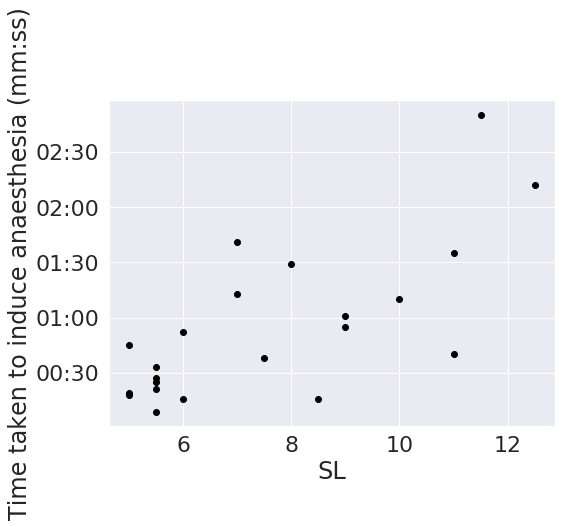

In [4]:
import seaborn as sns, matplotlib.pyplot as plt
fig, axes = plt.subplots(figsize=(8, 6))
sns.set(font_scale=2)
P1_df=df[df.P=='1']

P1_df_1_dose=P1_df[P1_df.Repeat_no<1.5]
P1_df_rep_dose=P1_df[P1_df.Repeat_no>1.5]

#tips = P1_df.dropna(how='all')
#ax=sns.boxplot(x="Induction_time", y="SL", data=tips)
# add swarmplot
#ax=sns.swarmplot(x="Induction_time", y="SL", data=tips, color='black', alpha=0.75)
#ax.set(ylim=(-10, 2750))
#ax.set(xlabel='Time taken to induce anaesthesia', ylabel='SL')


ax = plt.subplot()
ax.plot(P1_df_1_dose.SL, P1_df_1_dose.Induction_time, 'o',c='black')
ax.yaxis.set_major_formatter(DateFormatter('%M:%S'))
ax.set(xlabel='SL', ylabel='Time taken to induce anaesthesia (mm:ss)')


,P,#,Repeat_no,Control,Date,Age,Induction_time,Lose_TR_time,RR_beats,RR_breaths,SL,TT_movement,TT_Recovery,Recovery,Induction_time_sec,Lose_TR_time_sec,TT_movement_sec,TT_Recovery_sec
0,1,1,1.0,N,15/07/2020,21,1900-01-01 00:00:21,1900-01-01 00:00:44,140.0,0.0,5.5,1900-01-01 00:01:09,1900-01-01 00:01:29,Y,21.0,44.0,69.0,89.0
1,1,2,1.0,N,15/07/2020,21,1900-01-01 00:00:09,1900-01-01 00:01:06,94.0,0.0,5.5,1900-01-01 00:01:14,1900-01-01 00:01:27,Y,9.0,66.0,74.0,87.0
2,1,3,1.0,N,15/07/2020,21,1900-01-01 00:00:16,1900-01-01 00:00:30,82.0,78.0,6.0,1900-01-01 00:01:13,1900-01-01 00:01:42,Y,16.0,30.0,73.0,102.0
3,1,4,1.0,N,15/07/2020,21,1900-01-01 00:00:19,1900-01-01 00:00:29,140.0,144.0,5.0,1900-01-01 00:01:00,1900-01-01 00:01:15,Y,19.0,29.0,60.0,75.0
4,1,5,1.0,N,15/07/2020,21,1900-01-01 00:00:45,1900-01-01 00:01:05,122.0,64.0,5.0,1900-01-01 00:01:11,1900-01-01 00:01:22,Y,45.0,65.0,71.0,82.0


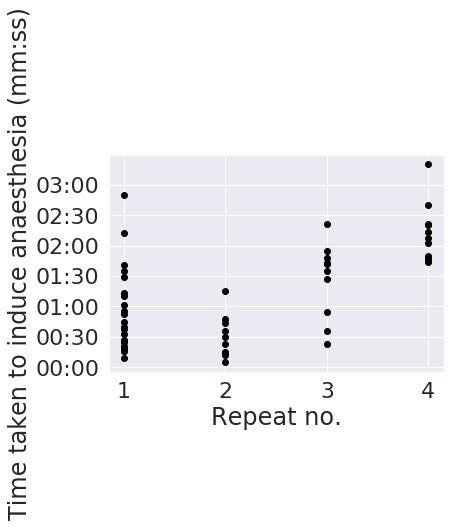

In [5]:
ax = plt.subplot()
ax.plot(P1_df.Repeat_no, P1_df.Induction_time, 'o',c='black')
ax.yaxis.set_major_formatter(DateFormatter('%M:%S'))
ax.set(xlabel='Repeat no.', ylabel='Time taken to induce anaesthesia (mm:ss)')

P1_df.head()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


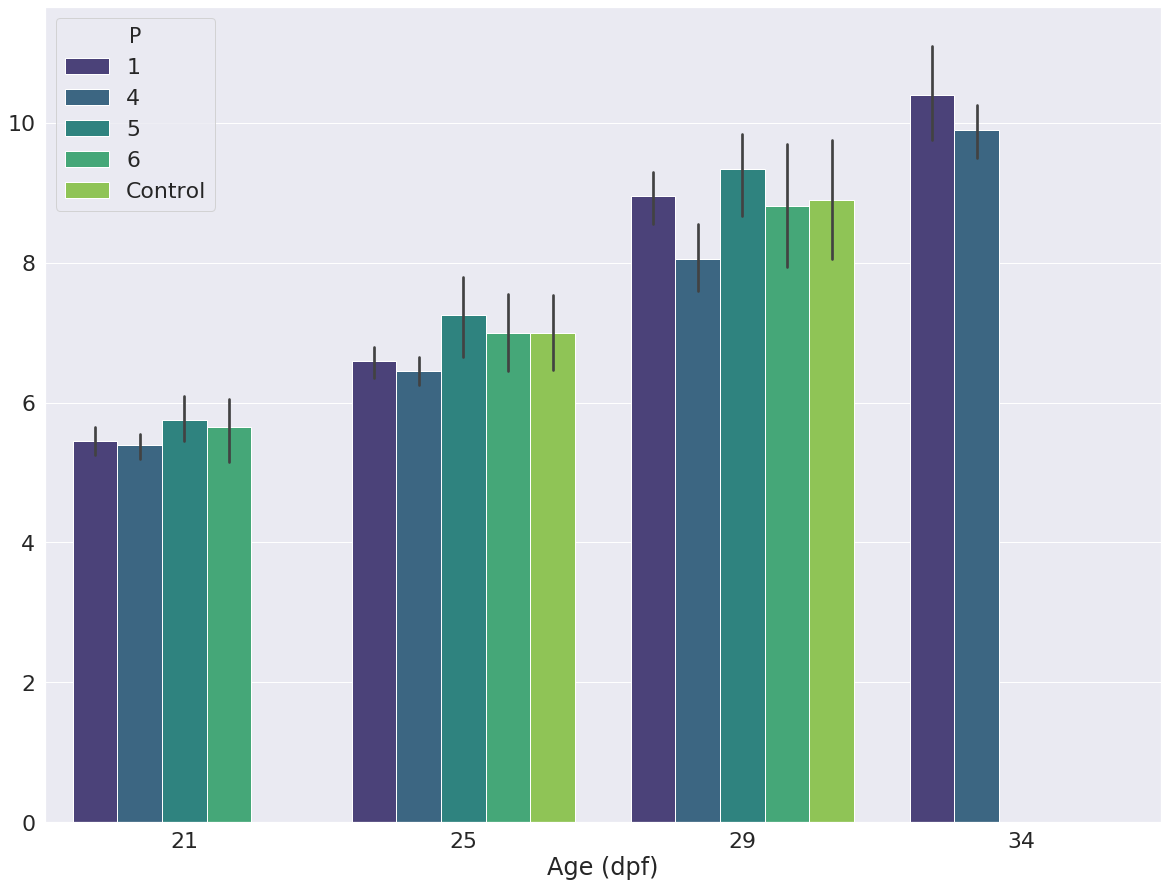

In [9]:
fig, axes = plt.subplots(figsize=(20, 15))

#Drop data points where repeat number is 1 as control
My_df = All_df.drop(All_df[(All_df.Repeat_no < 2) &  (All_df.Age > 21)].index)


#Drop NA values
tips = My_df.dropna(how='all')       
ax=sns.barplot(y='SL', x='Age', 
                 data=tips, 
                 palette="viridis",
                 hue='P')

ax.set_xlabel('Age (dpf)')
ax.set_ylabel('')

plt.savefig('Age_size.png', bbox_inches='tight')
plt.savefig('Age_size.eps', bbox_inches='tight')

/home/jpo22/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1270: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  squeeze=False)
/home/jpo22/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/jpo22/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this w

/home/jpo22/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1270: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  squeeze=False)
/home/jpo22/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/jpo22/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this w

/home/jpo22/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1270: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  squeeze=False)
/home/jpo22/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/home/jpo22/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:52: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this w

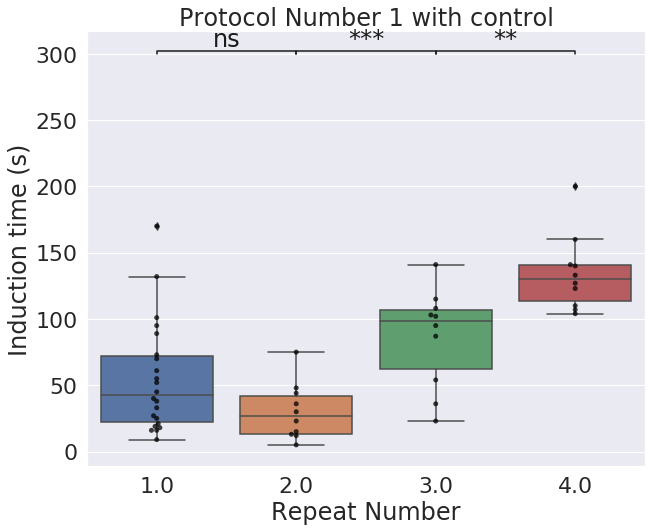

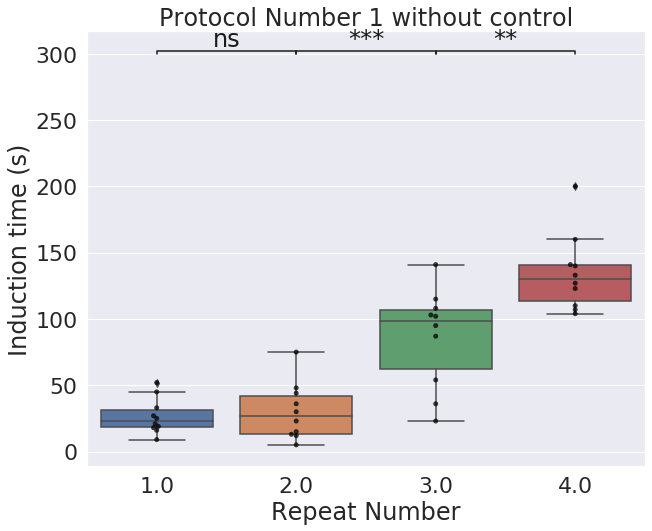

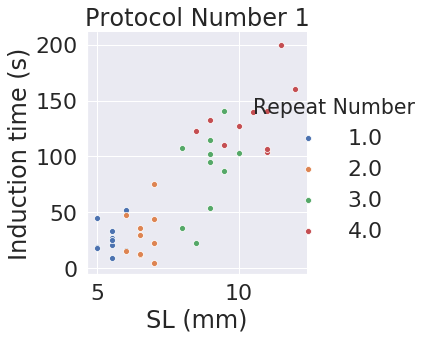

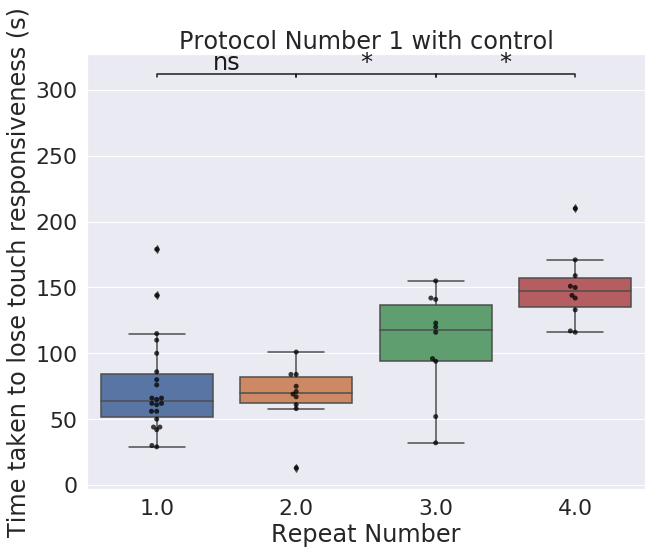

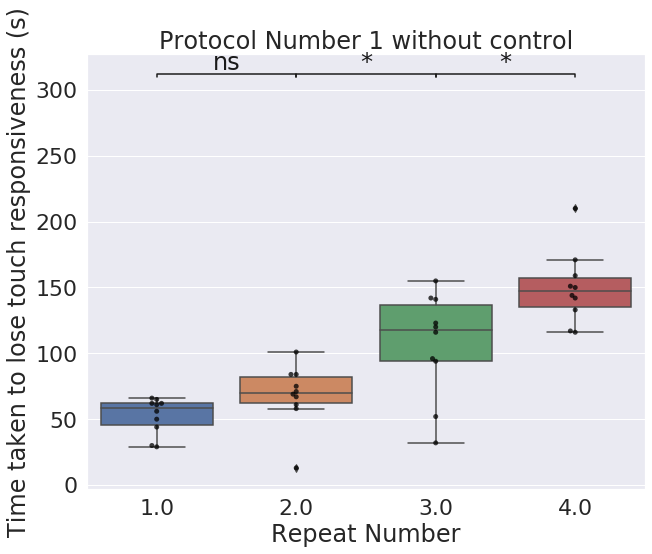

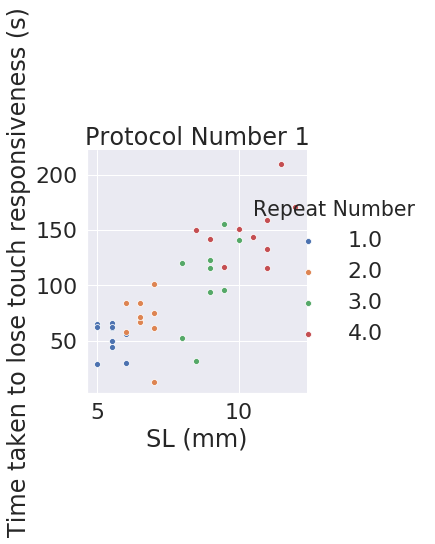

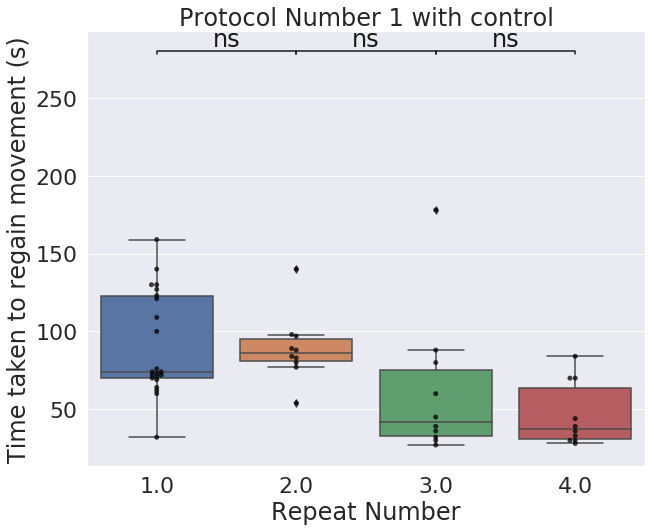

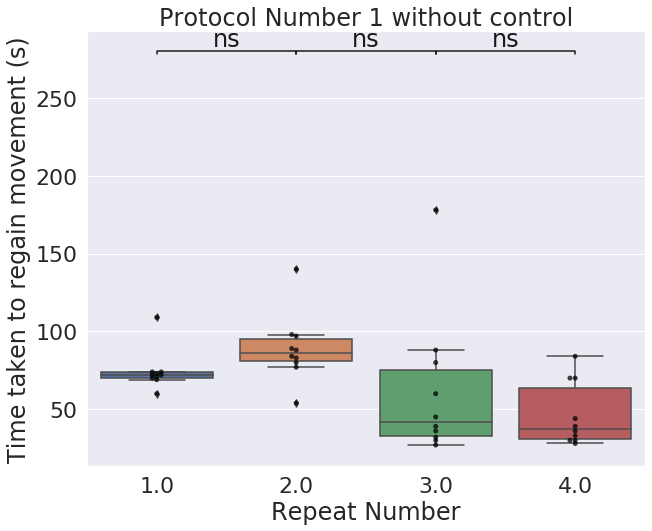

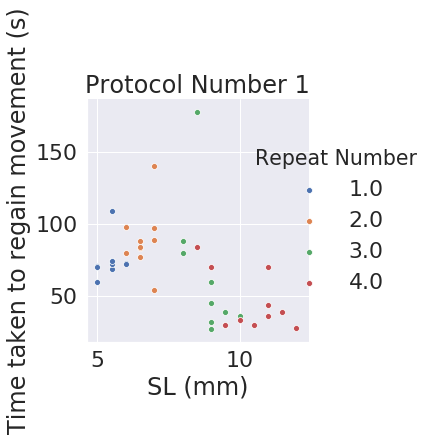

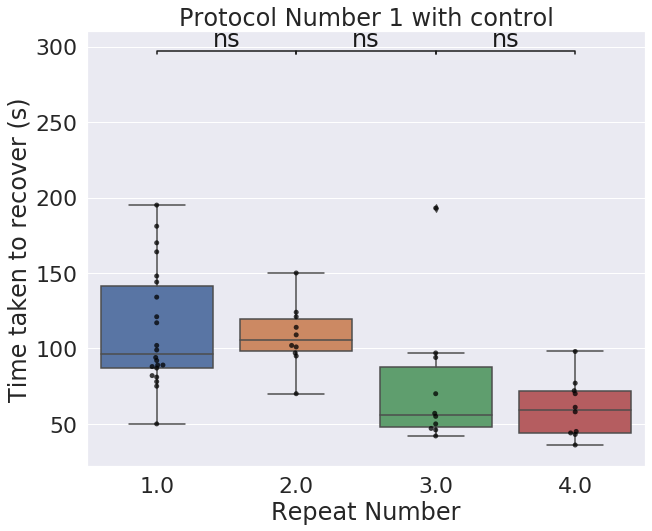

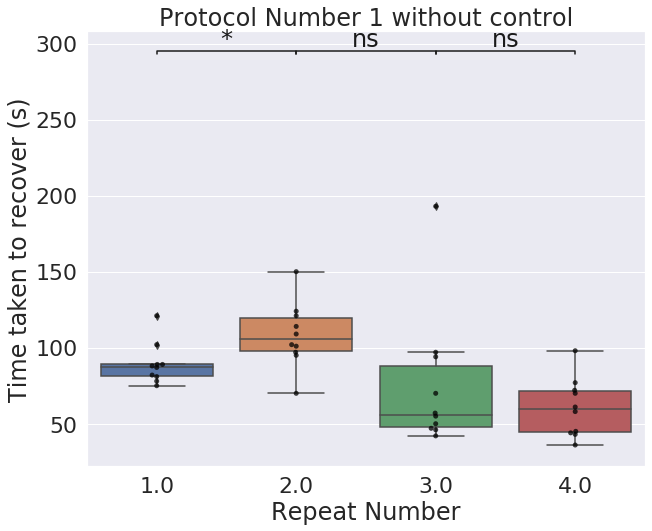

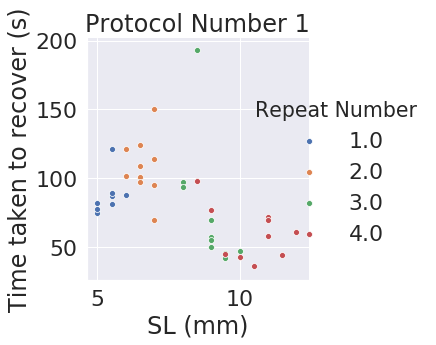

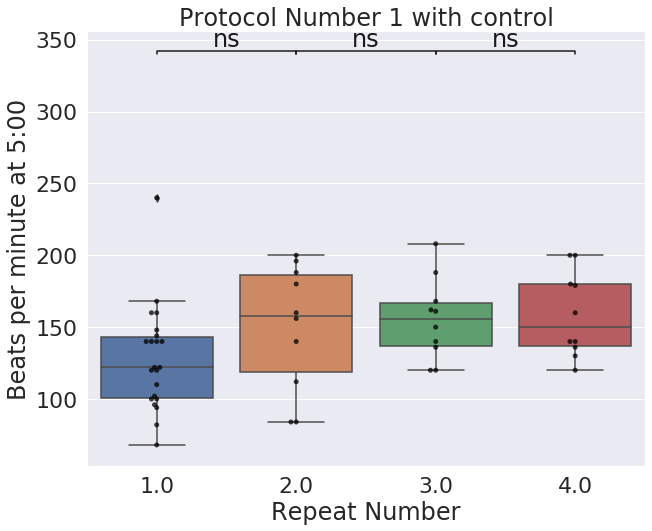

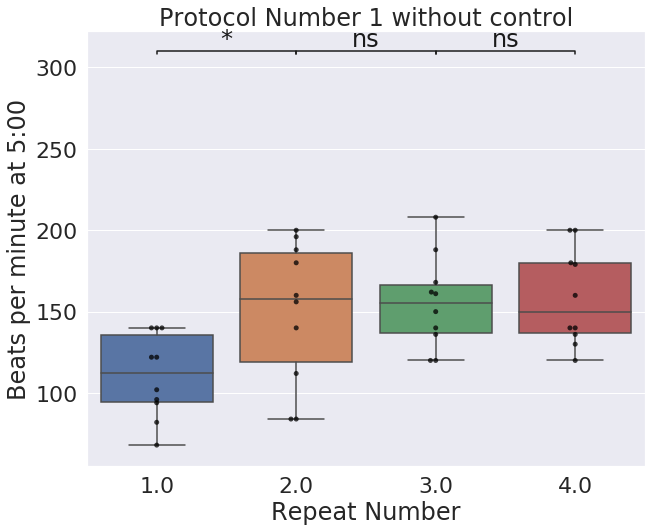

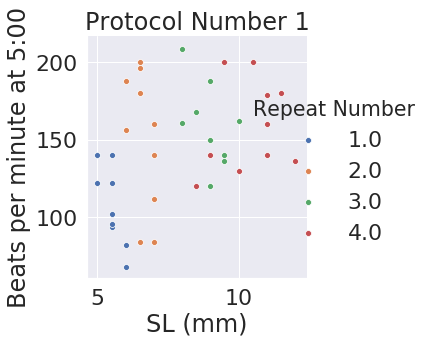

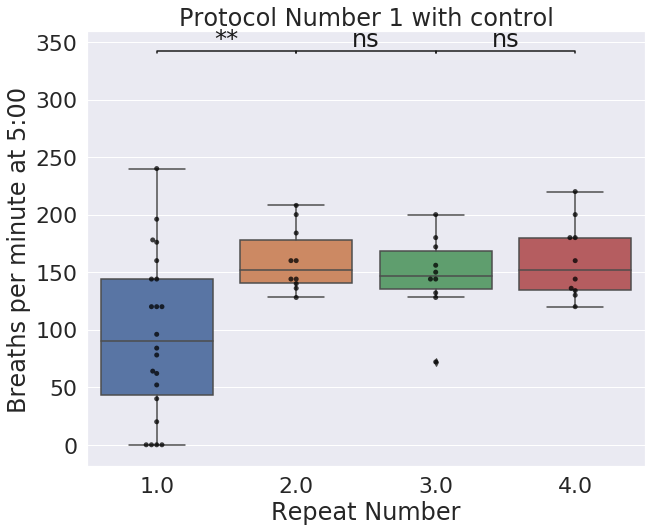

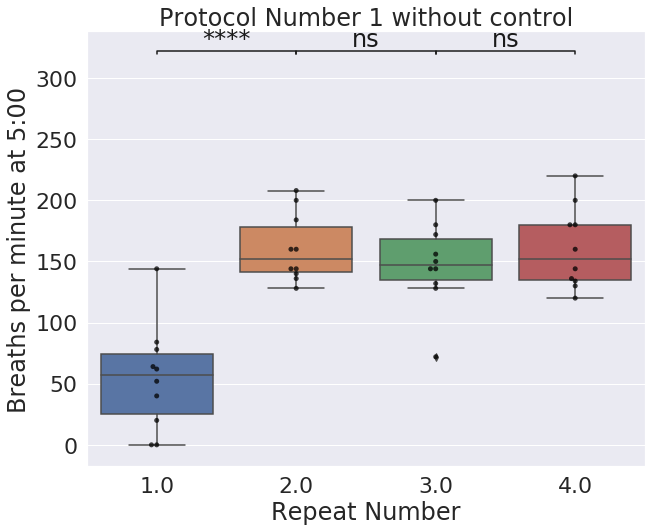

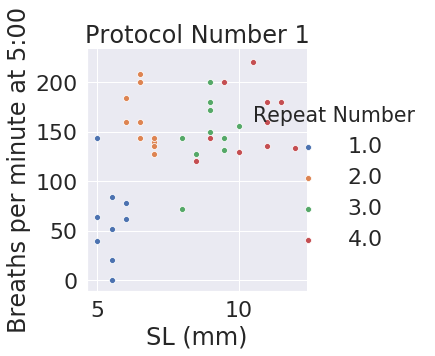

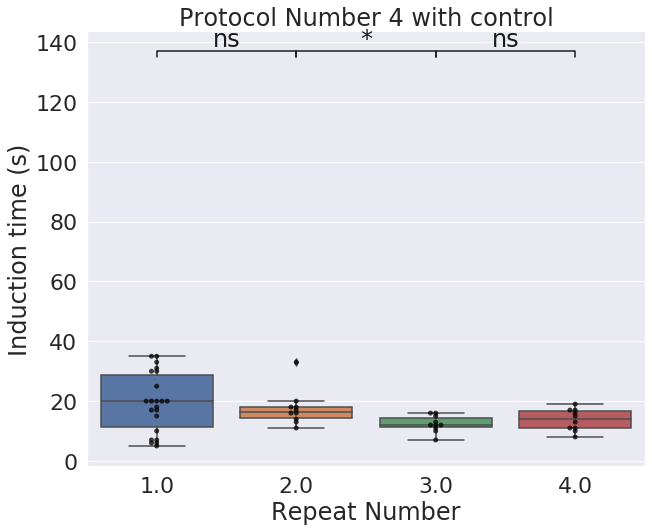

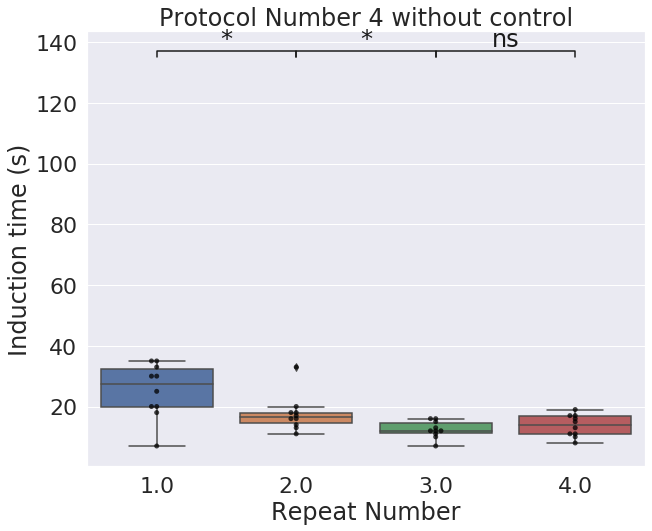

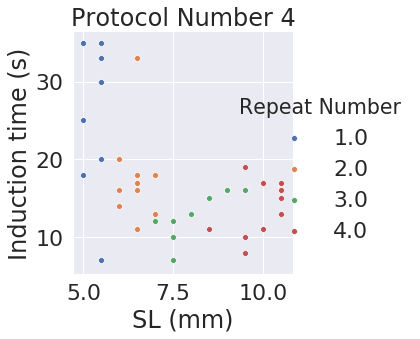

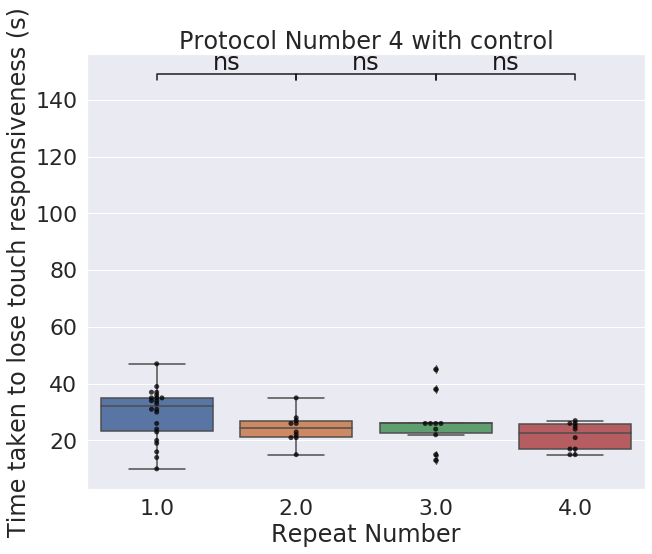

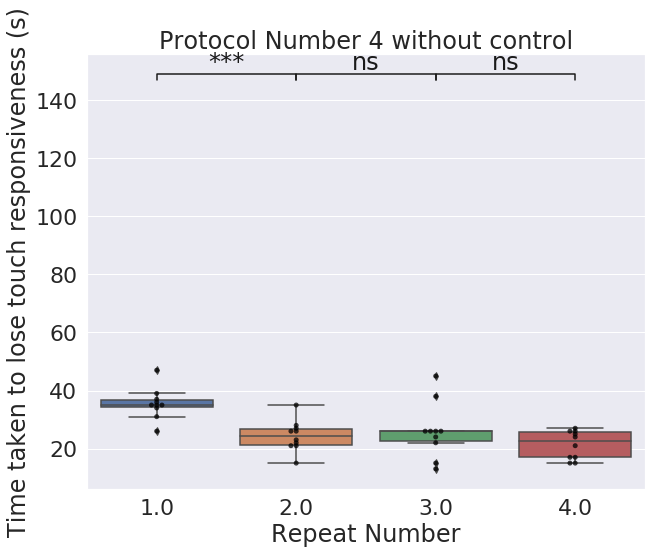

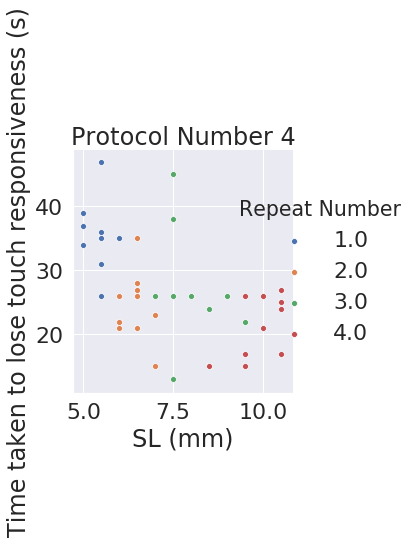

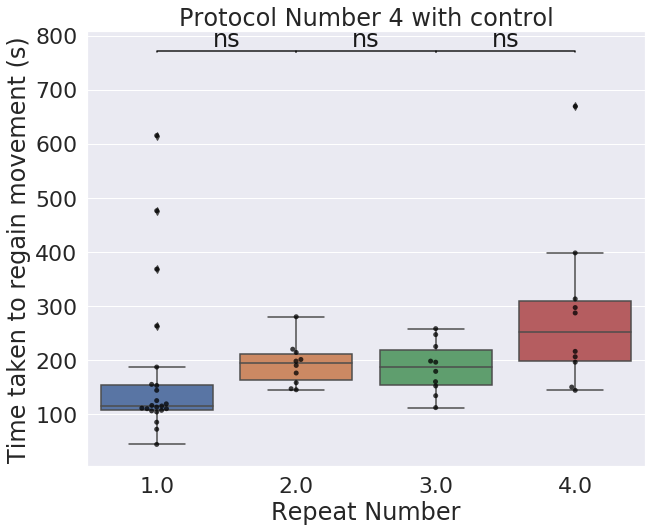

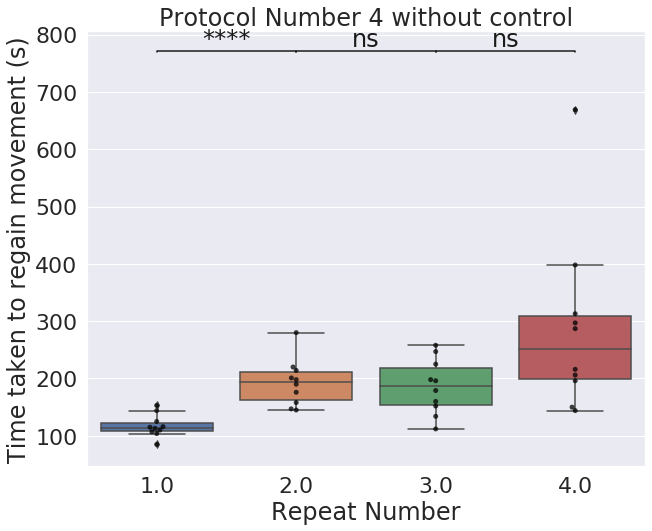

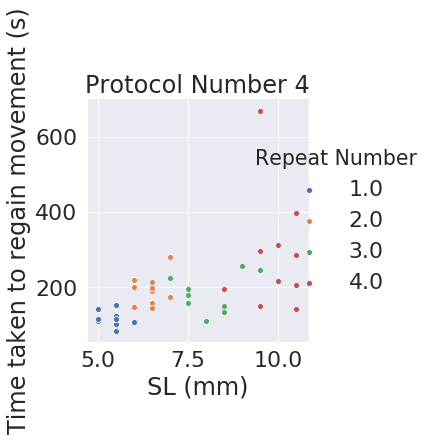

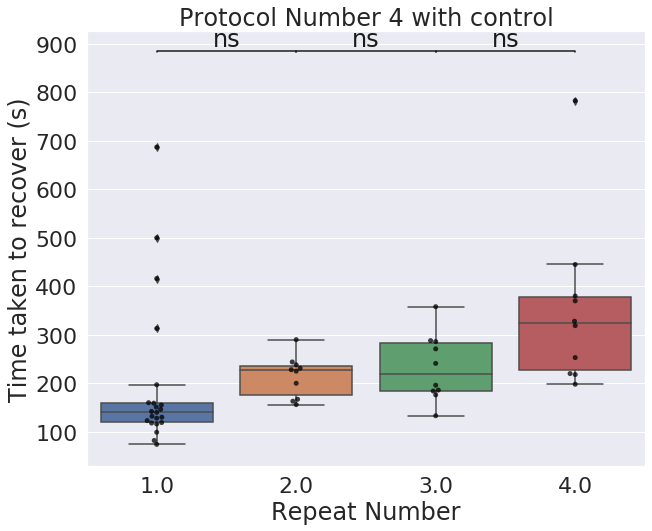

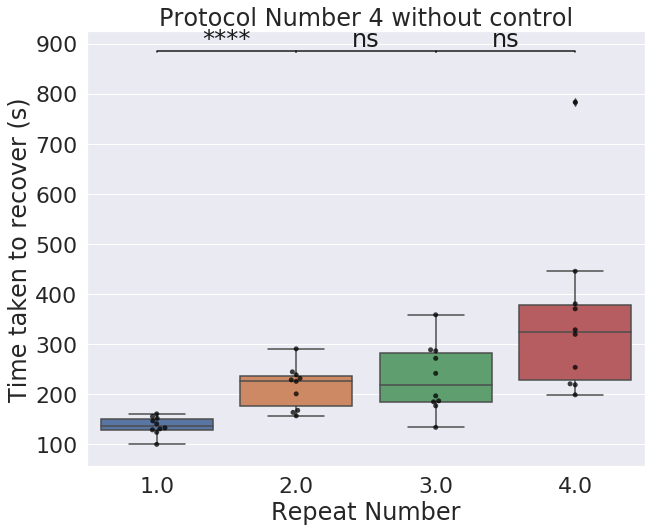

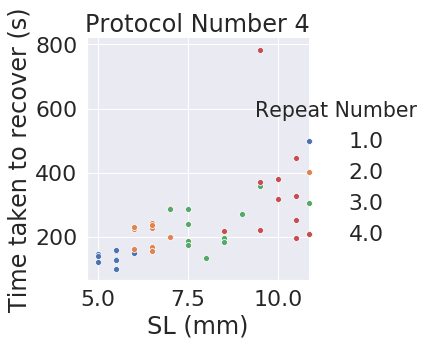

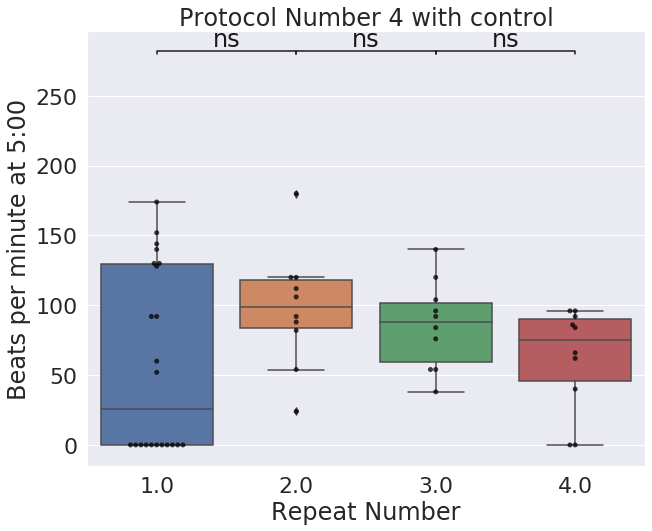

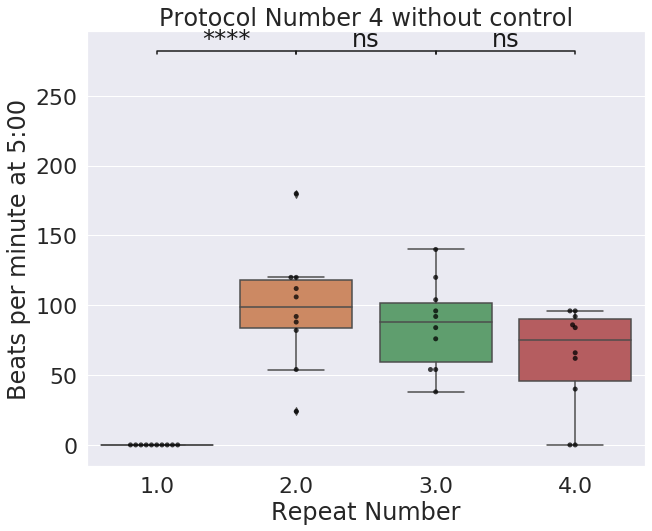

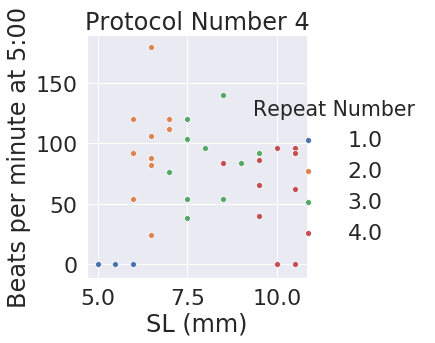

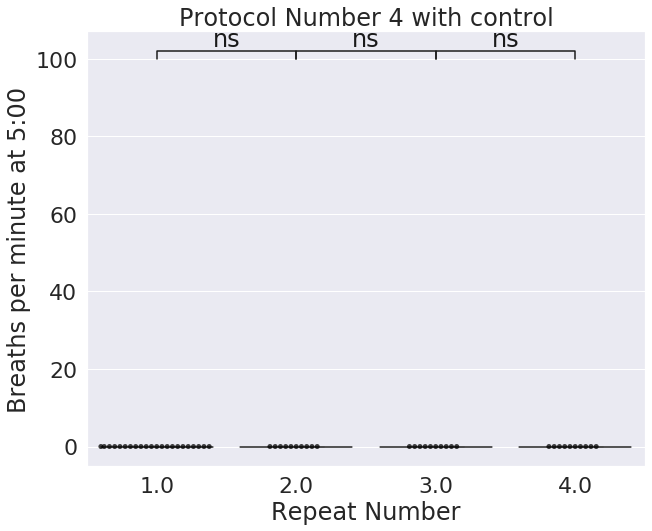

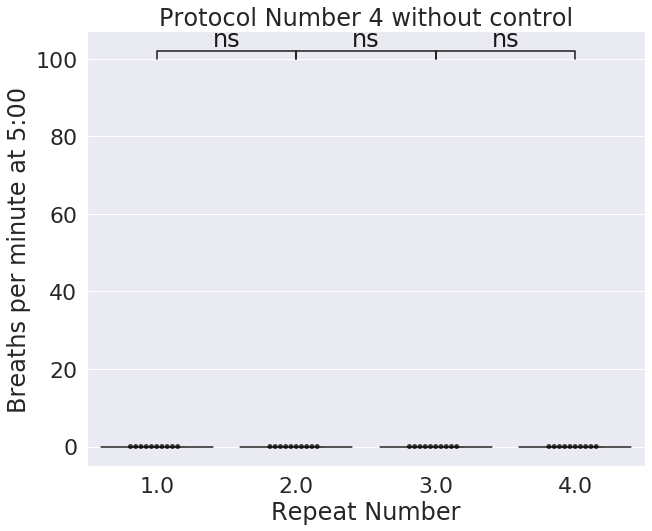

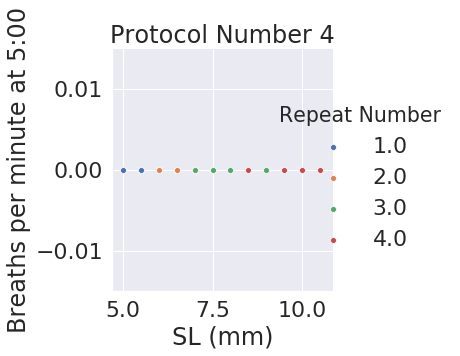

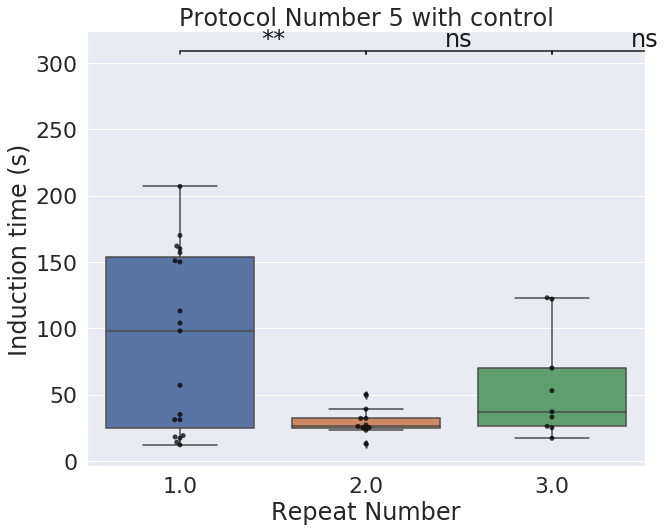

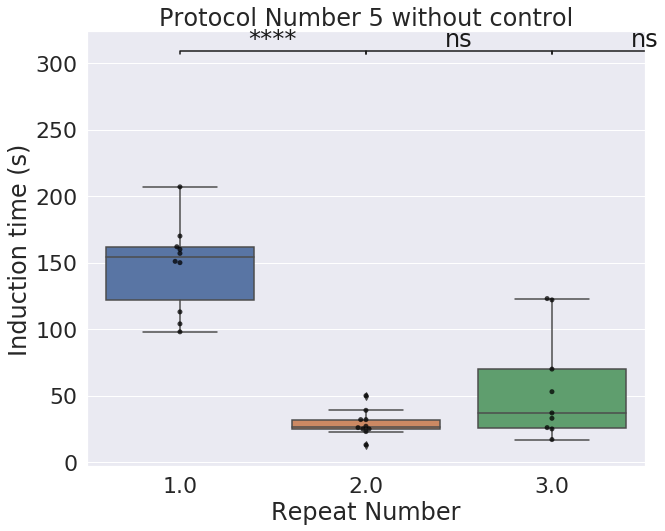

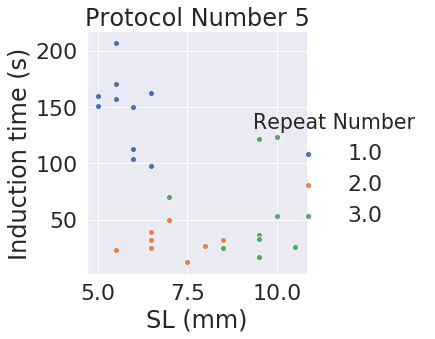

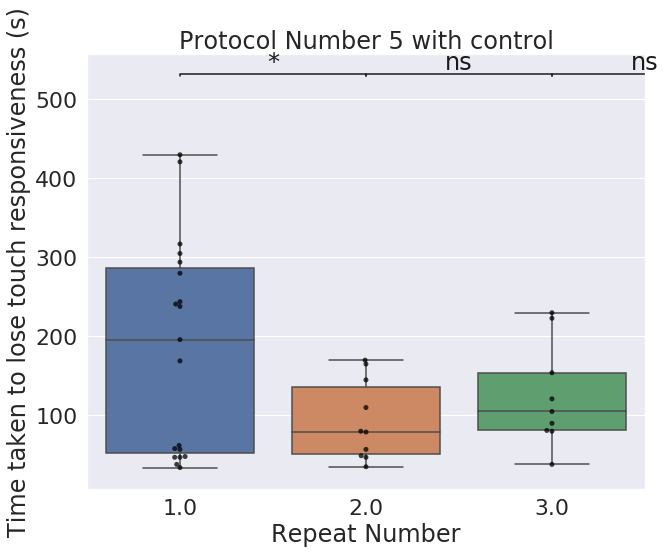

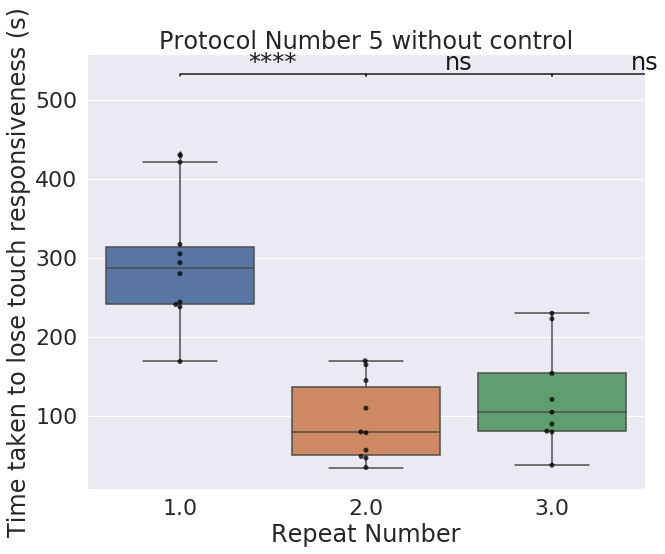

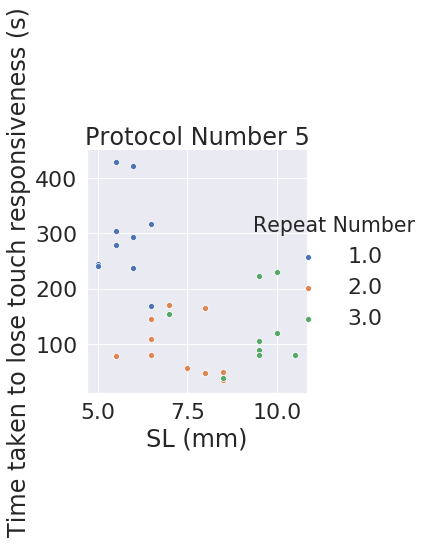

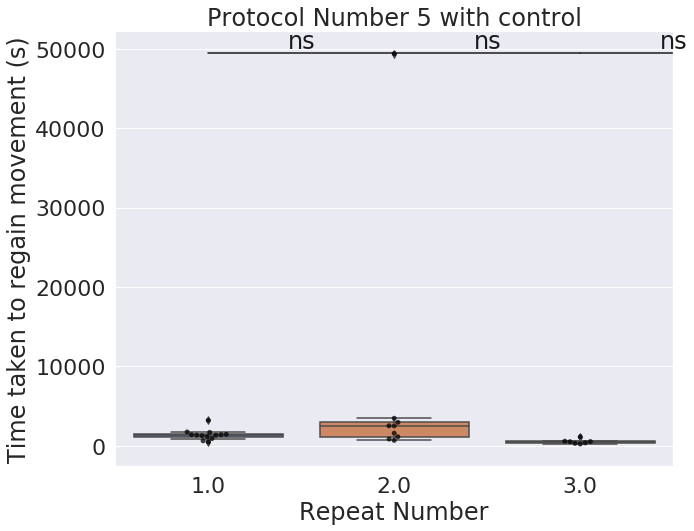

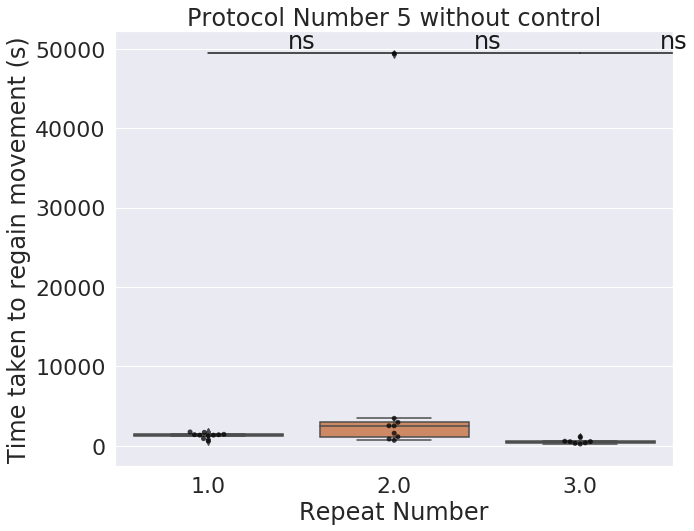

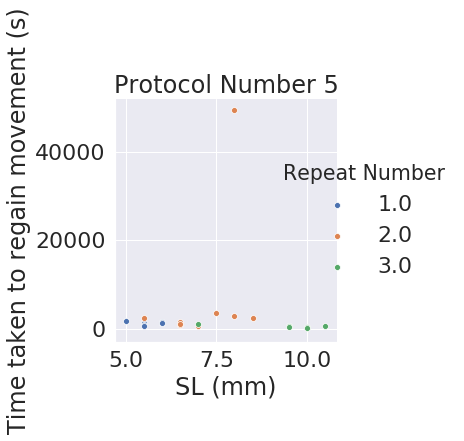

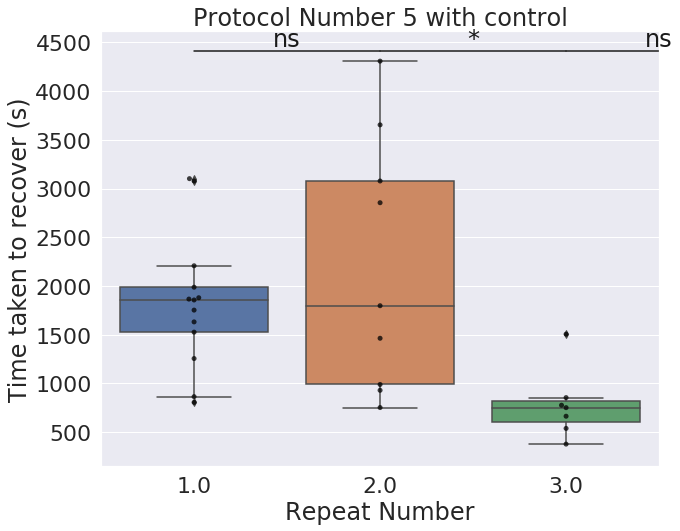

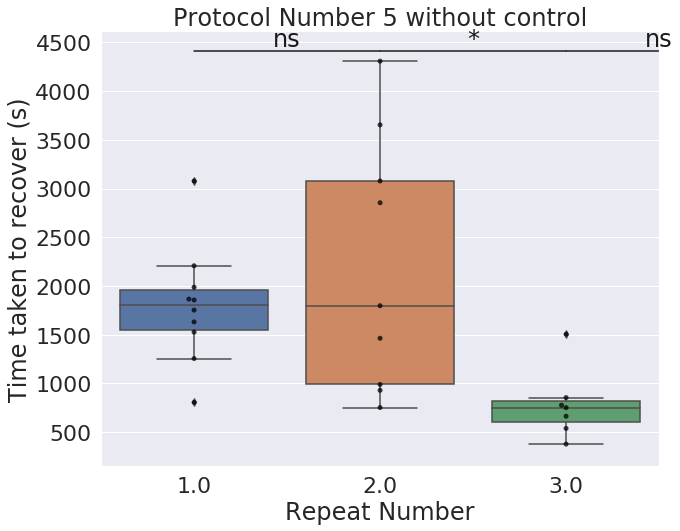

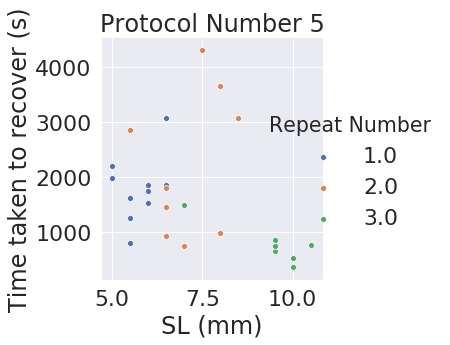

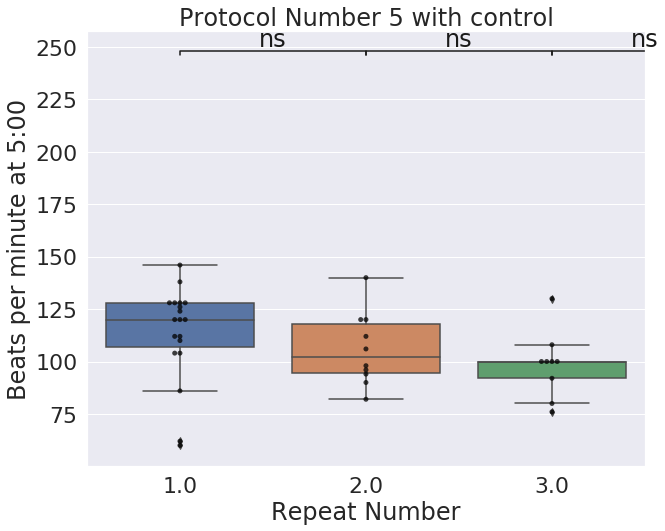

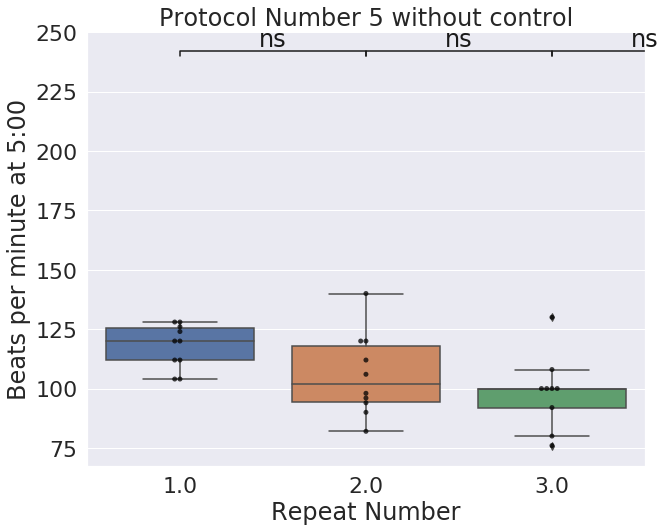

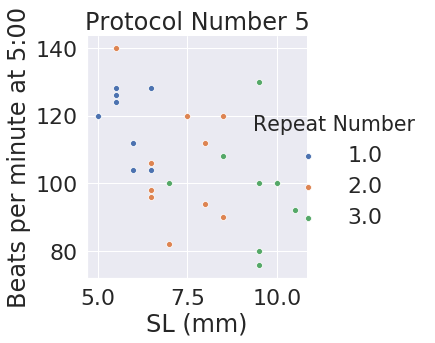

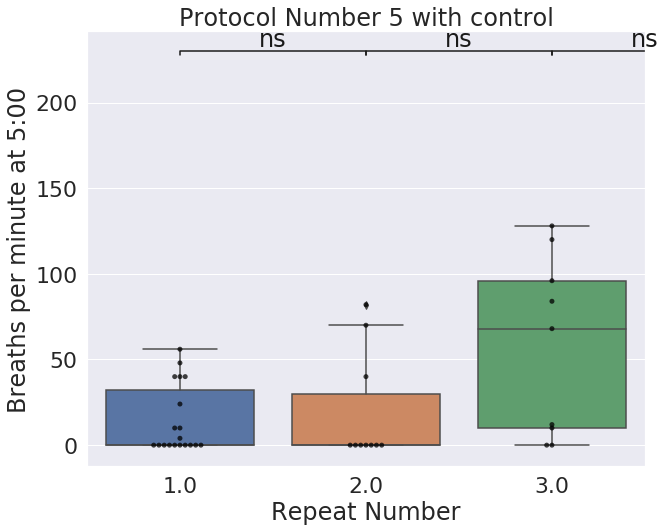

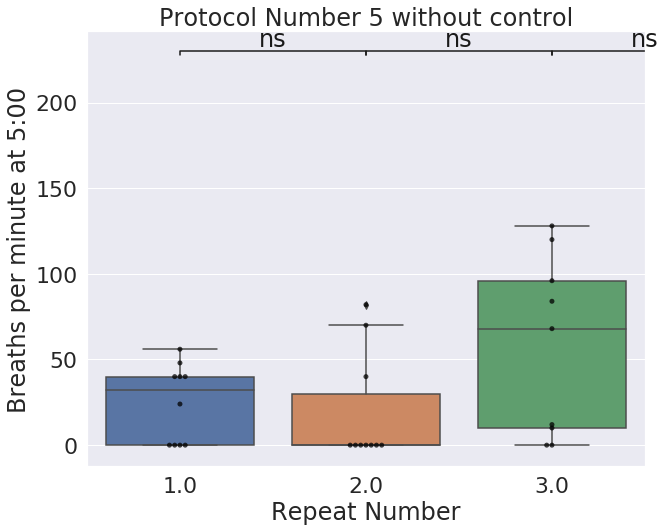

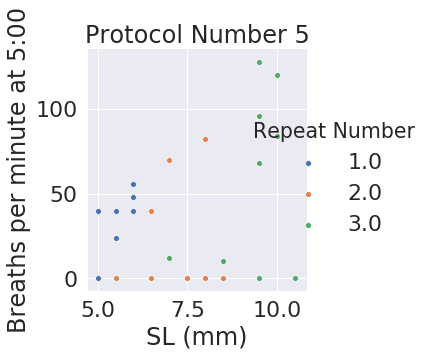

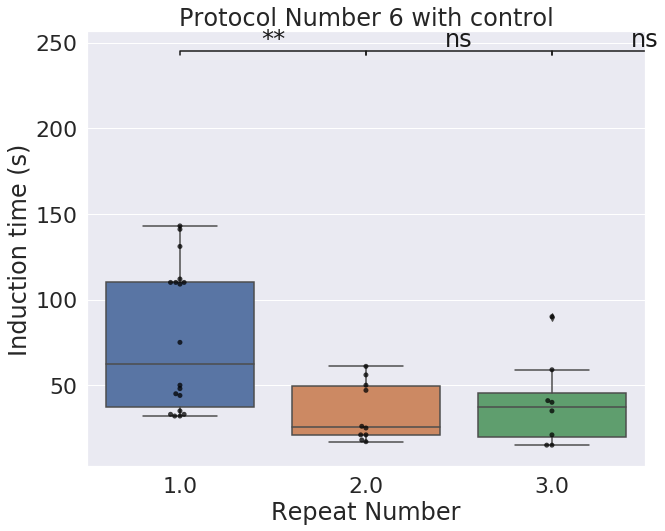

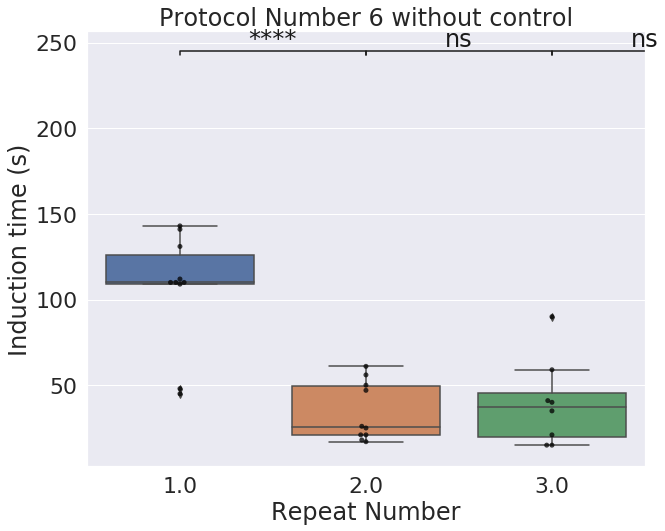

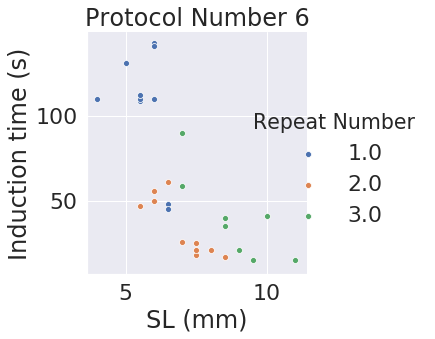

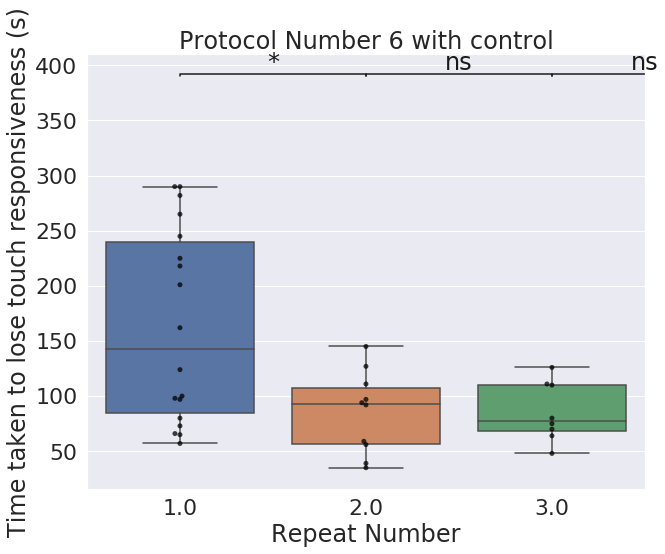

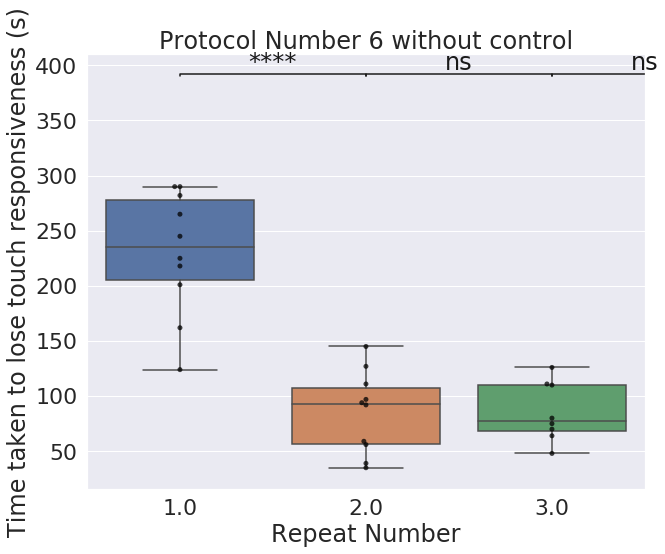

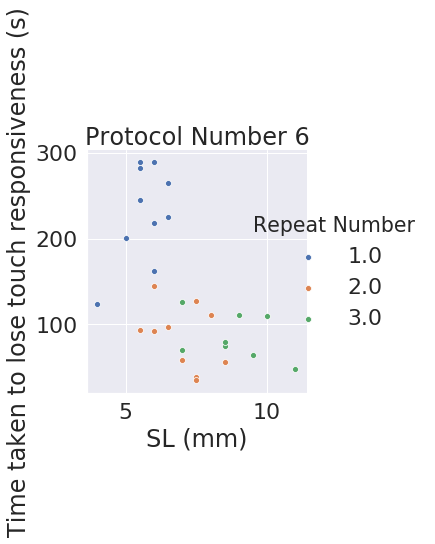

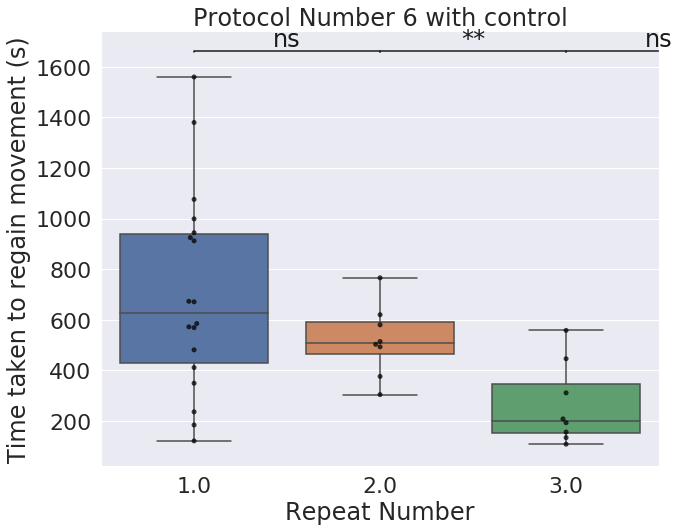

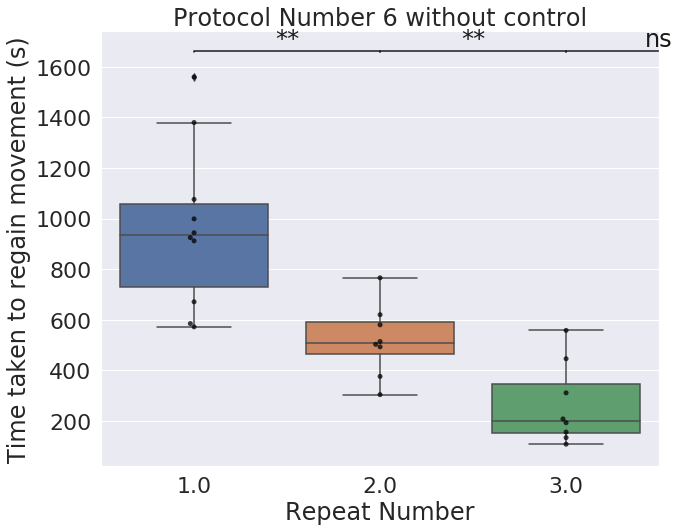

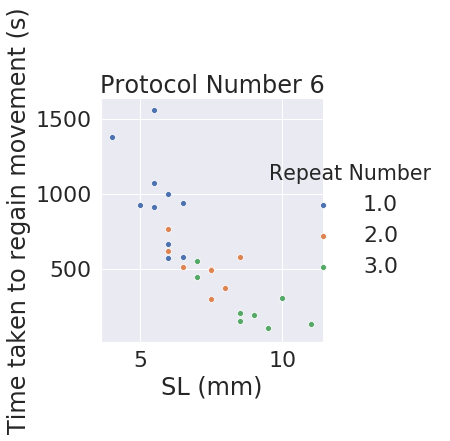

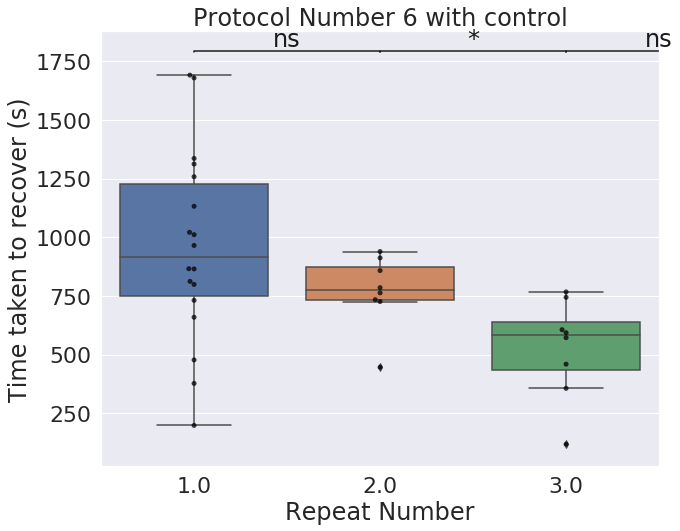

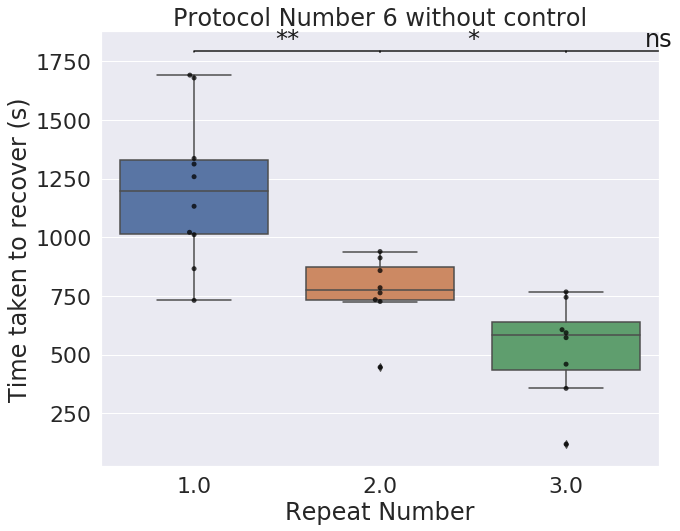

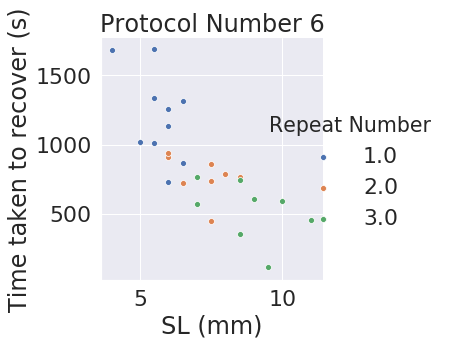

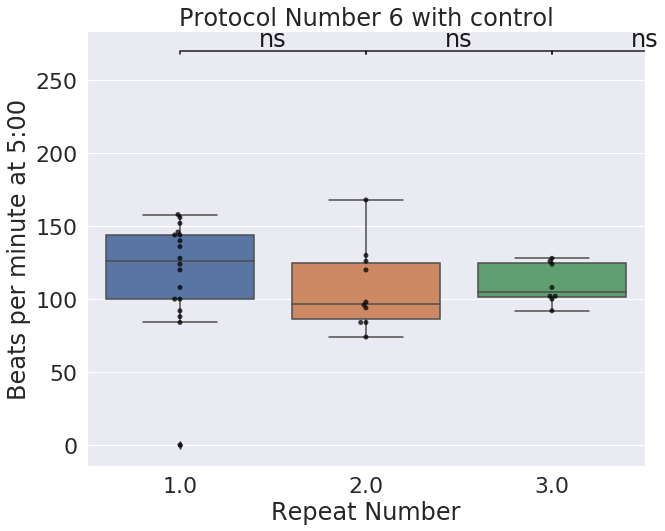

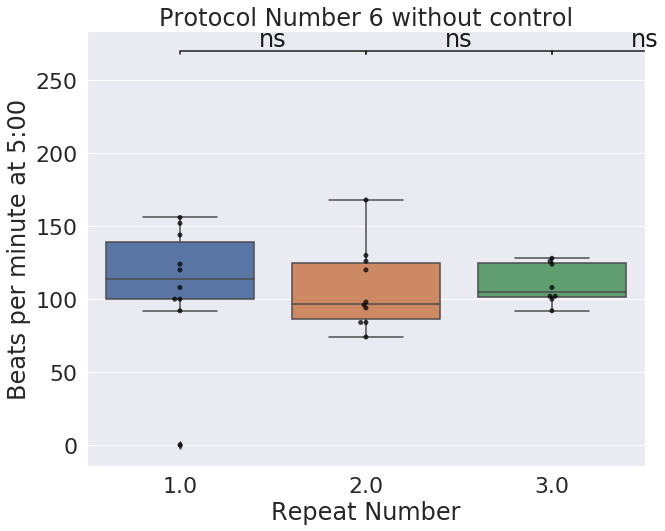

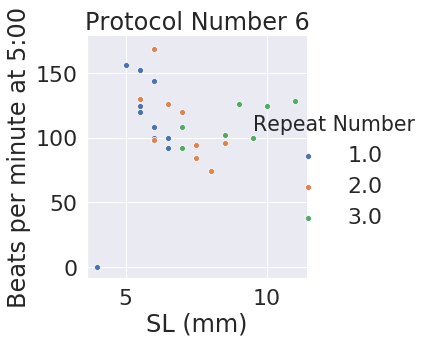

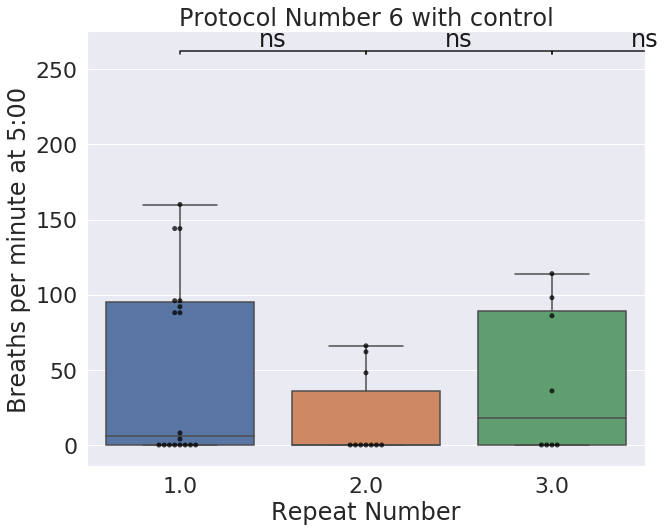

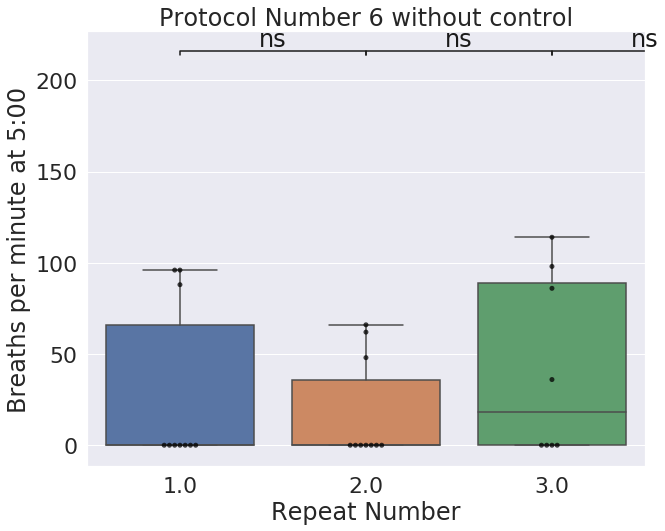

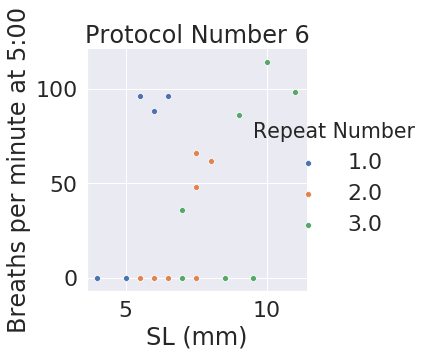

In [30]:
#Generates all my plots 
protocol = ['1','4','5','6']

#Convert to seconds
for j in protocol:

    p_df=df[df.P==j]
    
    for i,k in [('Induction_time_sec', 'Induction time (s)'),('Lose_TR_time_sec', 'Time taken to lose touch responsiveness (s)'),('TT_movement_sec', 'Time taken to regain movement (s)'),('TT_Recovery_sec','Time taken to recover (s)'),('RR_beats','Beats per minute at 5:00'),('RR_breaths', 'Breaths per minute at 5:00')]:
        
        
        for inc_control in ['_with_control','_without_control']:
        
        
            if inc_control=='_without_control':
            #Drop data points where repeat number is 1 as control
                My_df = p_df.drop(p_df[(p_df.Repeat_no < 2) &  (p_df.Age > 21)].index)
            else:
                My_df= p_df
        
            #Protocol number vs ....
        
            #See if there is a significant difference between consecutive repeat numbers 
            rep1_df=My_df.query('Repeat_no==1')
            rep2_df=My_df.query('Repeat_no==2')
            rep3_df=My_df.query('Repeat_no==3')
            rep4_df=My_df.query('Repeat_no==4')
        
            rep1=rep1_df[i]
            rep2=rep2_df[i]
            rep3=rep3_df[i]
            rep4=rep4_df[i]

            t2, p2 = stats.ttest_ind(rep1,rep2, nan_policy='omit')
            t3, p3 = stats.ttest_ind(rep2,rep3, nan_policy='omit')
            t4, p4 = stats.ttest_ind(rep3,rep4, nan_policy='omit')
        
            #Categorises according to the statistical significance
            def stars(p):
               if p < 0.0001:
                   return "****"
               elif (p < 0.001):
                   return "***"
               elif (p < 0.01):
                   return "**"
               elif (p < 0.05):
                   return "*"
               else:
                   return "ns"

        
            fig, axes = plt.subplots(figsize=(10,8))
            sns.set(font_scale=2)
            tips = My_df.dropna(how='all')
            ax=sns.boxplot(x="Repeat_no", y=i, data=tips)
            # add swarmplot
            ax=sns.swarmplot(x="Repeat_no", y=i, data=tips, color='black', alpha=0.75)
            ax.set(xlabel='Repeat Number', ylabel=k)
            ax.set(title='Protocol Number '+j+inc_control.replace('_', ' '))
        
        
            for l in range(3):
             #statistical annotation
                x1 = l
                x2 = l+1   # columns 
                y, h, col = tips[i].max() + 100, 2, 'k'
                plt.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
                if l < 1:
                   p=p2
                elif l == 1:
                   p=p3
                else: 
                   p=p4
                plt.text((x1+x2)*.5, y+h, stars(p), ha='center', va='bottom', color=col)
    
        
            plt.savefig(i+'Protocol_'+j+inc_control+'.png',bbox_inches='tight')
        #plt.savefig(i+'Protocol_'+j+'.eps',bbox_inches='tight')
        
        #Size vs ....
    #  fig, axes = plt.subplots(figsize=(10, 10))
     #   ax = plt.subplot()
        ax=sns.pairplot(x_vars="SL", y_vars=i, data=tips, hue="Repeat_no", height=5)
        
       # ax.scatter(data=tips, x="SL", y=i+"_sec", 'o',c="Repeat_no")
        ax.set(xlabel='SL (mm)', ylabel=k)
        ax.set(title='Protocol Number '+j)
        ax._legend.set_title('Repeat Number')
        
        
        
        plt.savefig('SL_'+i+'Protocol_'+j+'.png',bbox_inches='tight')
        #plt.savefig('SL_'+i+'Protocol_'+j+'.eps',bbox_inches='tight')